# Check dictionary properties

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import os


In [2]:
from boostlets_mod import get_boostlets_dict, genBoostlet

## Load dictionary or generate boostlets

In [3]:
# N = 128
# S = 3
# n_thetas = 15

# folder = "./"
# file = f"boostlets_N_{N}_S_{S}_nthetas_{n_thetas}.mat"
# file_path = os.path.join(folder, file)
# print(file_path)

# Sk = sio.loadmat(file_path)['Psi']
# print(Sk.shape)

N = 128
S = 3
n_thetas = 15

a_grid = 2 ** np.arange(S)
theta_grid = np.linspace(-np.pi/2, np.pi/2, n_thetas)

Sk = get_boostlets_dict(N, a_grid, theta_grid)



## Sum up the square of each function in the dictionary


 valores de Sk.*Sk :
 mean: (1.4996024707049966+1.313768652458585j)
 min: 0.0
 max: 2.512215209413954


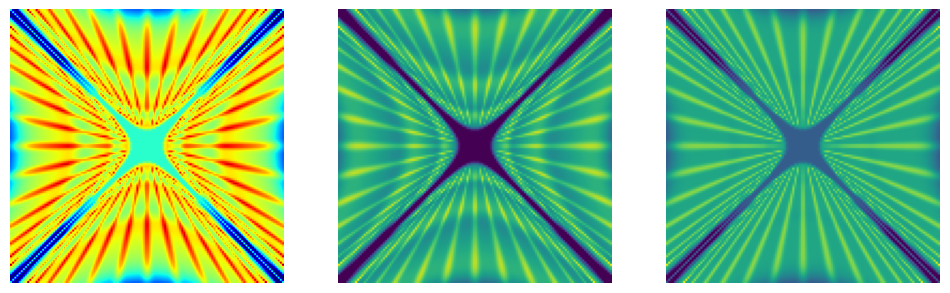

In [4]:
A = np.sum(Sk*Sk, axis=2)

print()
print(" valores de Sk.*Sk :")
print(f" mean: {A.mean()}")
print(f" min: {A.real.min()}")
print(f" max: {A.real.max()}")


fig, ax = plt.subplots(1,3, figsize=(12, 12) )
ax[0].imshow(  (A).real, cmap="jet" , clim=[0, 2.5]) 
ax[1].imshow(  (A).imag  )
ax[2].imshow(np.abs(A))

ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')

plt.show()


# Shearlets in the saved dictionaries

In [5]:
room = "Balder"
S = 3

folder = "./dependencies/basisFunctions"
file = f"{room}_tau{S}.mat"

file_path = os.path.join(folder, file)
print(file_path)

Sh = sio.loadmat(file_path)['Psi']
print(Sh.shape)

./dependencies/basisFunctions\Balder_tau3.mat
(3623, 128, 29)


(128, 128)

 valores de Sh.*Sh :
 mean: 1.0000000337525463
 min: 0.9997395209691206
 max: 1.0002819136958412


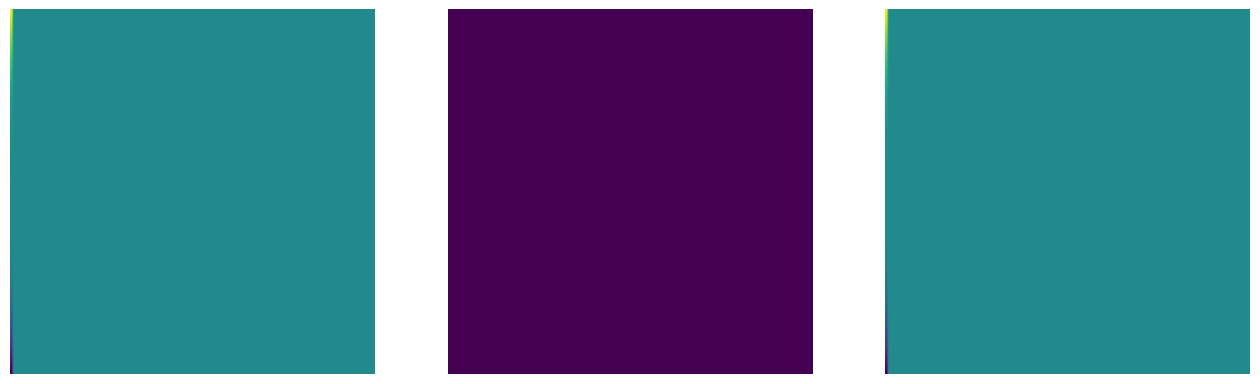

In [10]:
B = np.sum(Sh*Sh, axis=2)

M = B.shape[0]//2
B = B[M-128//2 : M+128//2 , : ]
print(B.shape)

print()
print(" valores de Sh.*Sh :")
print(f" mean: {B.mean()}")
print(f" min: {B.real.min()}")
print(f" max: {B.real.max()}")


fig, ax = plt.subplots(1,3, figsize=(16, 16) )
ax[0].imshow((B).real)
ax[1].imshow((B).imag)
ax[2].imshow(np.abs(B))

ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')

plt.show()

### The results do not add 1 everywhere for boostlets
+ The results are the same in Matlab and Python (checked the min, max and mean)
+ To recover an image, we project the image in Fourier into the dictionary. The coefficients are also projected in Fourier to the dictionary.
+ F_coef(row, col, d) = F_image(row, col) .* F_dict(row, col, d)
+ F_imageRecov(row, col) = $\sum_d$ F_coef(row, col, d) .* F_dict(row, col, d)
+ F_imageRecov(row, col) = $\sum_d$ F_image(row, col) .* F_dict(row, col, d) .* F_dict(row, col, d) = F_image(row, col) .* $\sum_d$  F_dict(row, col, d)$^2$

Then for the image, to have a perfect reconstruction:
- F_image = F_imageRecov
- $\sum_d$  F_dict(row, col, d)$^2$ = ones(row, col)

The boostlets used here do not return "ones".  
The shearlets used in the Paper for Balder, they return "ones".  
The shearlets from Matlab shearletSystem only return "ones" if the flag PreserveEnergy is active.  